In [13]:
!pip show hiperwalk |head
!date

Name: hiperwalk
Version: 2.0b0
Summary: High-Performance Quantum Walk Simulator
Home-page: 
Author: 
Author-email: Gustavo Bezerra <gbezerra@posgrad.lncc.br>, Paulo Motta <prmottajr@gmail.com>, Renato Portugal <portugal@lncc.br>
License: GNU Lesser General Public License

_Version 3, 29 June 2007_  
ERROR: Pipe to stdout was broken
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe
Wed Jan  7 14:14:23 -03 2026


In [2]:
import sys
print(sys.executable)
import numpy as np
import hiperwalk as hpw
print(hpw.__file__)
import hiperblas as hb
print(hb.__file__)
from datetime import datetime
import time

/usr/bin/python3
/mnt/c/Users/bidu/OneDrive/aLncc/passeiosQuantDez25/hiperwalk/hiperwalk/__init__.py
/mnt/c/Users/bidu/OneDrive/aLncc/passeiosQuantDez25/hiperwalk/pyhiperblas/hiperblas.cpython-312-x86_64-linux-gnu.so


## Coined quantum walk on the two-dimensional grid

In [3]:
#!echo $USER
#!date
#!pwd
#!cd ../../../../hiperblas-core;make clean; make install; ls -ltr
#!cd ../../../../pyhiperblas; pwd;  pip install --user .
#!cd ../../../../hiperwalk; pwd;  pip install --user hiperwalk



### Defining the graph and the QW instance

Let set $n$ for the two-dimensional square grid graph with $n^2$ vertices.

In [14]:
hb="y"
myHPC_option="cpu" if hb == "y" else None

hpw.set_hpc(myHPC_option)
dim = 18
aCoin="F"
numSteps=200; startStep=1; endStep=startStep+numSteps; step=1 

aRange=(startStep, endStep, step)


BD, em def set_hpc(hpc), hpc= None


The next command creates a grid, which is an instance of the Graph class.

In [5]:
inicioG = time.perf_counter()
g = hpw.Hypercube(dim)
fimG    = time.perf_counter()
print(f"Hypercube: Tempo decorrido: {fimG - inicioG:.6f} segundos", file=sys.stderr)

Hypercube: Tempo decorrido: 0.025107 segundos


The next command creates a QW on the grid, which is an instance of the Coined class.

In [6]:
inicioC = time.perf_counter()
qw = hpw.Coined(g, coin=aCoin)
fimC    = time.perf_counter()
print(f"computeU : Tempo decorrido: {fimC - inicioC:.6f} segundos", file=sys.stderr)



bd, em coined.py, __init__
graph: <hiperwalk.graph.graph.Graph object at 0x70a30bd84a70>
kwargs: {'coin': 'G'}
_set_shift     :   Tempo decorrido: 0.015569 segundos
_set_coin      :   Tempo decorrido: 0.000076 segundos
_set_marked    :   Tempo decorrido: 0.000673 segundos
bd, em hiperwalk/quantum_walk/coined.py: def _set_evolution
BD, em hiperwalk/quantum_walk/coined.py: get_coin(self)
bd, em _set_evolution, computeU,  U = S @ C 
U = S @ C        # cria novos os arrays 
_set_evolution :   Tempo decorrido: 0.032612 segundos


computeU : Tempo decorrido: 0.049690 segundos


In [7]:
    import os
    from pathlib import Path  # Import the Path class
    C = qw.get_evolution(); num_arcs=C.shape[0];  densidade=C.nnz/(num_arcs*num_arcs)


    coinT  = "Grover  coin,    real" if aCoin=="G"            else "Fourier coin, complex"
    algebra="SciPy"                  if myHPC_option == None else "HiperBlas"
    
    #nome=os.path.splitext(os.path.basename(__file__))[0] # sem extensão
    nome_do_notebook_completo = "meu_notebook.ipynb" # Ou você pode tentar obter isso do IPython
    nome = Path(nome_do_notebook_completo).stem
    print(
    f"{nome:14s}, "
    f"dim = {dim:4d}, "
    f"numStep = {endStep - startStep:4d}, "
    f"{coinT}, "
    f"numArcs = {num_arcs:10d}, "
    f"nnz = {C.nnz:12d}, "
    f"densidade = {densidade:.5e}, "
    f"algebra = {algebra:>10s}, "
    f"OMP_NUM_THREADS = {os.getenv('OMP_NUM_THREADS') or 'ND':>3s} ")
    print('\n')

meu_notebook  , dim =   10, numStep =    5, Grover  coin,    real, numArcs =      10240, nnz =       102400, densidade = 9.76562e-04, algebra =      SciPy, OMP_NUM_THREADS =   4 




### Setting the initial state 

In [8]:
initialState = qw.state([[1, i] for i in range(dim)])

bd, em coined.py: def state


### Simulation 

In [9]:

print ("aRange=",aRange)
print(datetime.now())
inicioS = time.perf_counter()
for r in range(1): #50*1000*1000):
       states = qw.simulate(aRange, state=initialState)
fimS    = time.perf_counter()
print(f"Iteracoes: Tempo decorrido: {fimS - inicioS:.6f} segundos", file=sys.stderr)
print(datetime.now())


aRange= (1, 6, 1)
2026-01-07 14:10:34.376476
bd, em hiperwalk/quantum_walk/quantum_walk.py:    def simulate
bd, start=1, end=6, step=1
bd, em quantum_walk.py: def _prepare_engine(self, state, hpc =  None
bd, em simulate, initial state, state= [ 0.316  0.316  0.316 ...  0.000  0.000  0.000];  state.l2Norm= 1.0
bd, em def _simulate_step, step = 0
bd, em def simulate,                     state_index =  0
bd, em def _simulate_step, step = 1
bd, self._simul_vec_in  [ 0.316  0.316  0.316 ...  0.000  0.000  0.000],  self._simul_vec_in.l2Norm= 1.0
bd, self._simul_vec_out [ 0.000  0.000  0.000 ...  0.000  0.000  0.000], self._simul_vec_out.l2Norm= 1.0000000000000002
bd, em def simulate,                     state_index =  1
bd, em def _simulate_step, step = 1
bd, self._simul_vec_in  [ 0.000  0.000  0.000 ...  0.000  0.000  0.000],  self._simul_vec_in.l2Norm= 1.0000000000000002
bd, self._simul_vec_out [-0.253 -0.253 -0.253 ...  0.000  0.000  0.000], self._simul_vec_out.l2Norm= 1.0000000000000002


WhileIt  : Tempo decorrido: 0.005422 segundos
Iteracoes: Tempo decorrido: 0.009881 segundos


In [10]:
    U = qw.get_evolution(); num_arcs=U.shape[0];  densidade=U.nnz/(num_arcs*num_arcs)
    import os
    from pathlib import Path  # Import the Path class

    coinT  = "Grover  coin,    real" if aCoin=="G"            else "Fourier coin, complex"
    algebra="SciPy"                  if myHPC_option == None else "HiperBlas"
    
    #nome=os.path.splitext(os.path.basename(__file__))[0] # sem extensão
    nome_do_notebook_completo = "meu_notebook.ipynb" # Ou você pode tentar obter isso do IPython
    nome = Path(nome_do_notebook_completo).stem
    print(
    f"{nome:14s}, "
    f"dim = {dim:4d}, "
    f"numStep = {endStep - startStep:4d}, "
    f"{coinT}, "
    f"numArcs = {num_arcs:10d}, "
    f"nnz = {U.nnz:12d}, "
    f"densidade = {densidade:.5e}, "
    f"algebra = {algebra:>10s}, "
    f"OMP_NUM_THREADS = {os.getenv('OMP_NUM_THREADS') or 'ND':>3s}, "
    f"tempo computeU = {fimC - inicioC:.5e}, "
    f"tempo Iteracoes = {(fimS - inicioS) / (endStep - startStep + 1):.5e}, "
    f"tempo total = {(fimS - inicioG) :.5e}")
    print('\n')

meu_notebook  , dim =   10, numStep =    5, Grover  coin,    real, numArcs =      10240, nnz =       102400, densidade = 9.76562e-04, algebra =      SciPy, OMP_NUM_THREADS =   4, tempo computeU = 4.96896e-02, tempo Iteracoes = 1.64686e-03, tempo total = 3.76715e+01




### Probability distribution

In [11]:
#probs = qw.probability_distribution(states)

bd, em coined.probability_distribution, 0
bd, em coined.probability_distribution, 1
bd, em coined.probability_distribution, 5


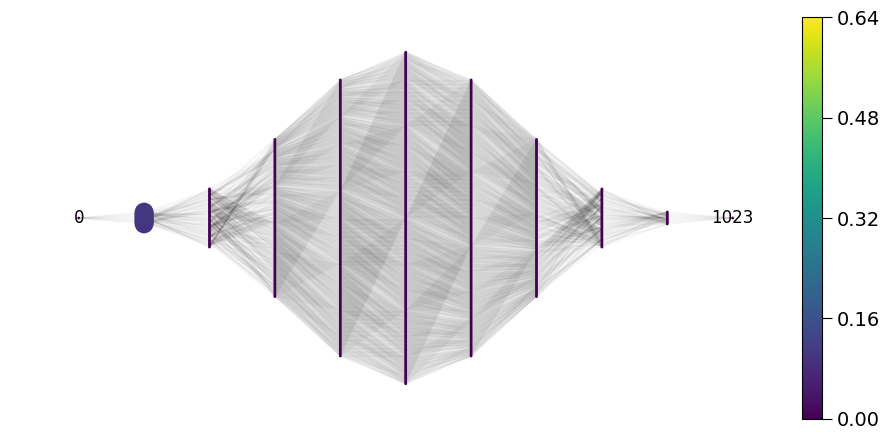

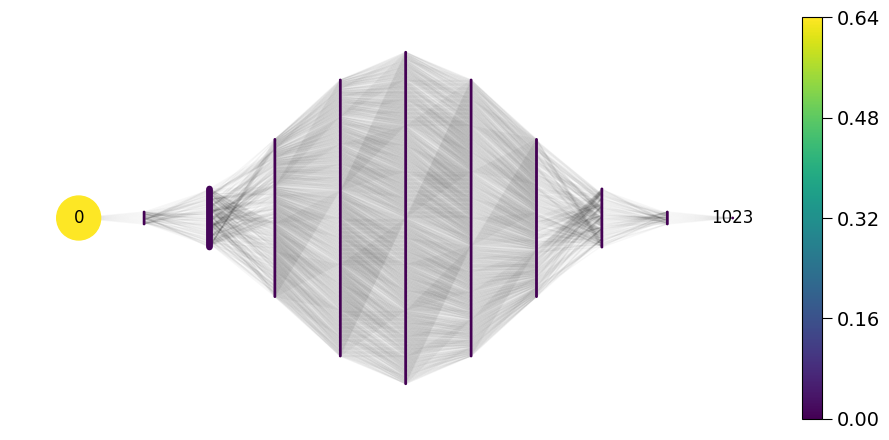

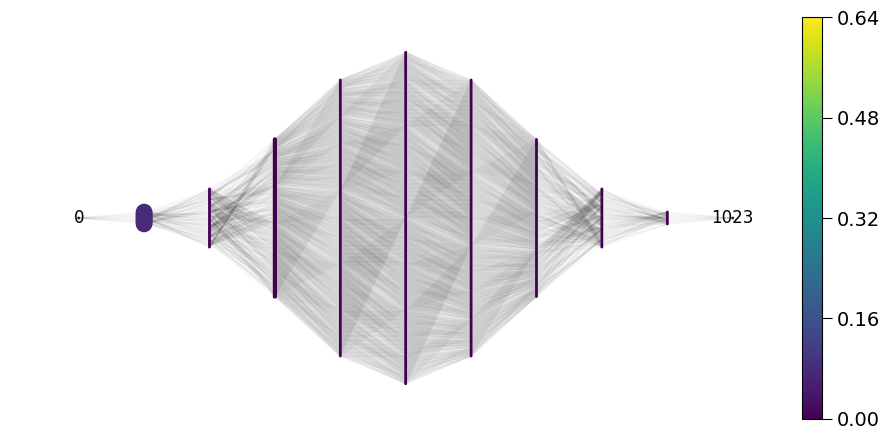

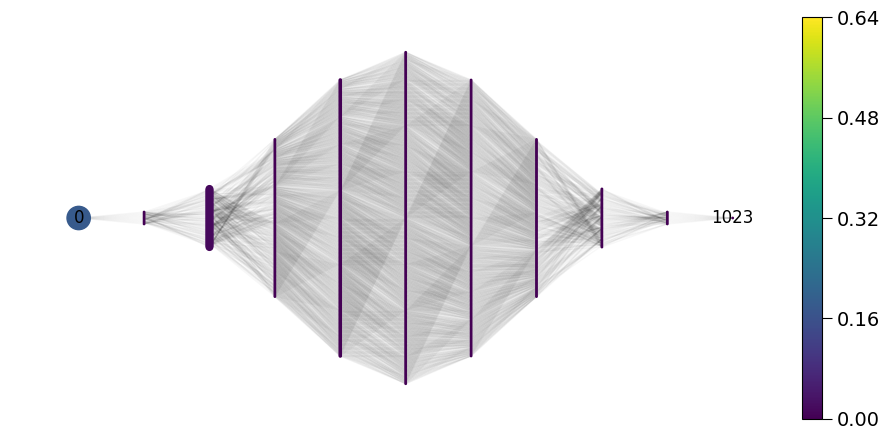

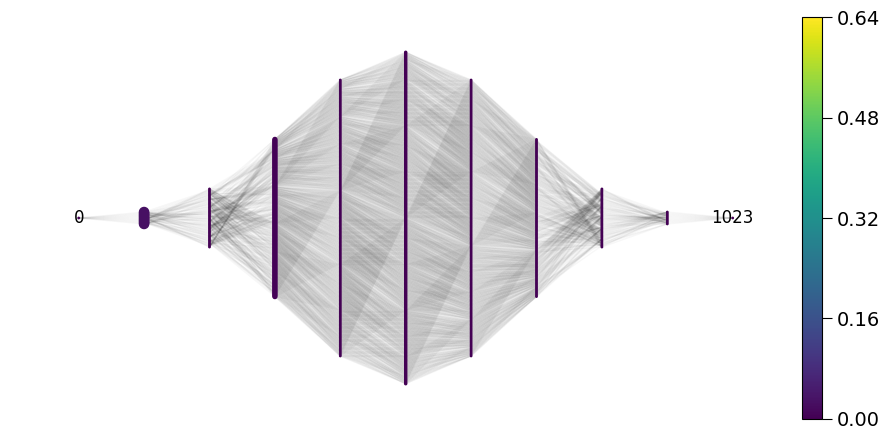

In [12]:
#hpw.plot_probability_distribution(probs[0:5], graph=g, figsize=(9,4.5))

### Animating the quantum walk

In [13]:
#list_of_states = qw.simulate(range = (n//2,n//2+1), state = psi0)
#print(datetime.now())
#probs = qw.probability_distribution(psi_final)
#hpw.plot_probability_distribution(probs, graph=g, animate=True, figsize=(9,4.5))
#print(datetime.now())

2025-12-08 07:33:40.994191


2025-12-08 07:33:42.041301
